In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

from pathlib import Path

# path for the database files
import sys
sys.path.append("../")

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, MetaData

# Reflect Tables into SQLAlchemy ORM

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [6]:
inspector = inspect(engine)


In [7]:
table_names = inspector.get_table_names()
table_names


['measurement', 'station']

In [8]:
# reflect the database into a new model

Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables


In [9]:
# View all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [21]:
# Save references to each table


In [10]:
# Assign the classes to  variables`
measurement = Base.classes.measurement  

station = Base.classes.station


In [11]:
session = Session(bind=engine)

In [12]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Use the session to query station table
for row in session.query(station.station, station.name, station.latitude, station.longitude, station.elevation).limit(15).all():
    print(row)

('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [15]:
for row in session.query(measurement.station, measurement.date, measurement.prcp, measurement.tobs).limit(15).all():
    print(row)

('USC00519397', '2010-01-01', 0.08, 65.0)
('USC00519397', '2010-01-02', 0.0, 63.0)
('USC00519397', '2010-01-03', 0.0, 74.0)
('USC00519397', '2010-01-04', 0.0, 76.0)
('USC00519397', '2010-01-06', None, 73.0)
('USC00519397', '2010-01-07', 0.06, 70.0)
('USC00519397', '2010-01-08', 0.0, 64.0)
('USC00519397', '2010-01-09', 0.0, 68.0)
('USC00519397', '2010-01-10', 0.0, 73.0)
('USC00519397', '2010-01-11', 0.01, 64.0)
('USC00519397', '2010-01-12', 0.0, 61.0)
('USC00519397', '2010-01-14', 0.0, 66.0)
('USC00519397', '2010-01-15', 0.0, 65.0)
('USC00519397', '2010-01-16', 0.0, 68.0)
('USC00519397', '2010-01-17', 0.0, 64.0)


In [16]:
# Starting from the most recent data point in the database. 
# This query returns a row, even for one field, so get value of first (0th) item in the row

last_precip_date_str = session.query(measurement.date).\
order_by((measurement.date).desc()).first()[0]

last_precip_date_str


'2017-08-23'

# Exploratory Precipitation Analysis

In [17]:
# Calculate the date one year from the last date in data set
# The date calculaion has to be defined in the same cell
# or jupyter notebook sees the date as undefined 

date_format = "%Y-%m-%d"
most_recent_date = dt.datetime.strptime(last_precip_date_str, date_format).date()
print(f"most recent date {most_recent_date}")

prior_year_date = most_recent_date - relativedelta(years=1)
print(f"prior year {prior_year_date}")

# Design a query to retrieve the last 12 months of precipitation data and print results

precip_list = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= prior_year_date).\
    order_by(measurement.date).all()
    
precip_list

most recent date 2017-08-23
prior year 2016-08-23


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

range(0, 6)
['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10', '2017-08-23']
[0.  1.4 2.8 4.2 5.6 7. ]


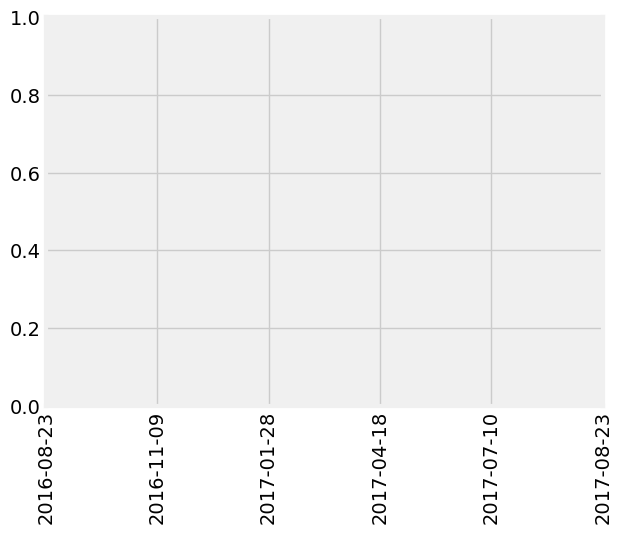

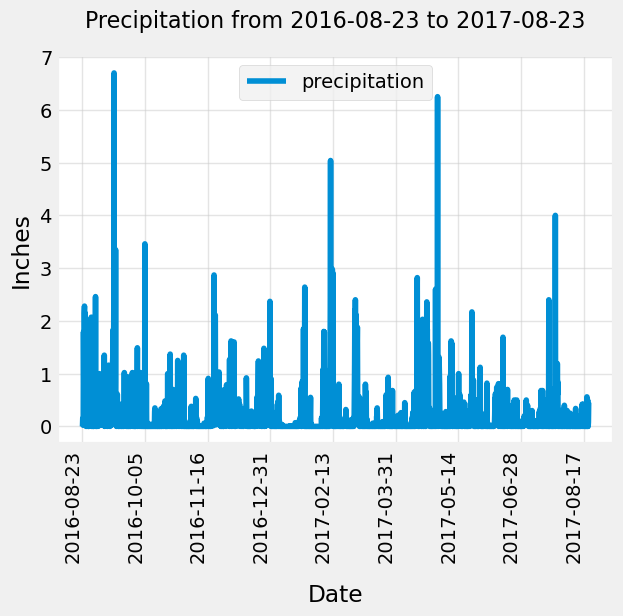

In [32]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_list, columns=['date', 'precipitation'])

# Convert the 'date' column to datetime type
#precip_df['date'] = pd.to_datetime(precip_df['date'])

# drop  NaN values
precip_df.dropna(inplace=True)

# Sort the dataframe by date
#precip_df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the precipitation data

# Set the size of the figure to 8 inches width and 6 inches height
fig = plt.figure(facecolor='white')
fig.figsize=(12, 10)

#precip_df.plot(x='date', y='precipitation')
#plt.tight_layout()

x_lbls = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10', '2017-08-23']

#x_ticks = range(0, len(x_lbls), 6) 
x_ticks = range(0, len(x_lbls)) 

# Plot ticks with a rotation

xtickpos = np.linspace(0, len(x_lbls)+1, 6)
print(x_ticks)
print(x_lbls)
print(xtickpos)
plt.xticks(xtickpos, [x_lbls[i] for i in x_ticks], rotation=90)
#plt.xticks(xtickpos, x_lbls, rotation=90, ha='right') 

ax = precip_df.plot(x='date', y='precipitation')

ax.grid(alpha = .5)
ax.set_facecolor('white')

plt.xlabel('Date', labelpad=15)
plt.ylabel('Inches', labelpad=5)

plt.title(f'Precipitation from {prior_year_date} to {most_recent_date}', pad=20, fontsize=16)

plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

  
# plt.xticks(xtickpos, [x_lbls[i] for i in x_ticks], rotation=90, ha='right')

#plt.tight_layout()
#plt.xticks(xtickpos, x_lbls, rotation=90, ha='right') 

# Show the figure

plt.show()


<Figure size 640x480 with 0 Axes>

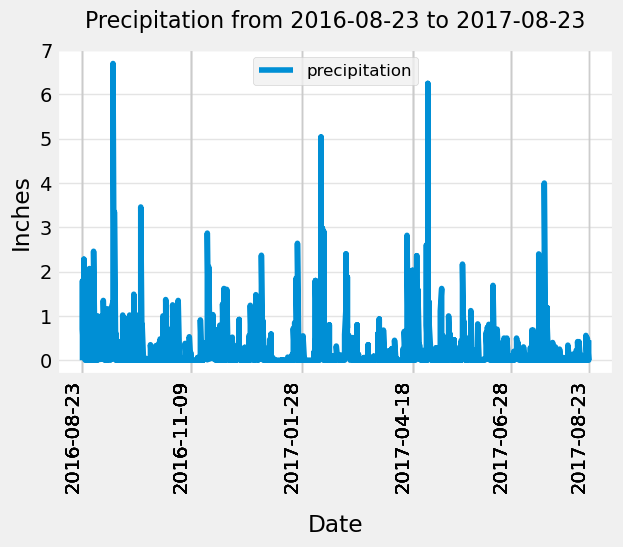

In [51]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_list, columns=['date', 'precipitation'])

# Convert the 'date' column to datetime type
precip_df['date'] = pd.to_datetime(precip_df['date'])

# Drop NaN values
precip_df.dropna(inplace=True)

# Sort the dataframe by date
precip_df.set_index('date', inplace=True)

# Set the size of the figure
fig = plt.figure(facecolor='white')
fig.figsize=(12, 10)

# Define the xtick labels
x_lbls = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10', '2017-08-23']
x_lbls = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-06-28', '2017-08-23']
x_lbls_datetime = pd.to_datetime(x_lbls)

# Define the positions for the x-ticks
xtickpos = precip_df.index[precip_df.index.isin(x_lbls_datetime)]

# Check if all xtickpos exist in x_lbls_datetime
xtickpos = xtickpos[xtickpos.isin(x_lbls_datetime)]

# Get corresponding labels for existing xtickpos
xtick_lbls = [str(date.date()) for date in xtickpos]

ax = precip_df.plot(y='precipitation')
ax.grid(alpha = .5)
ax.set_facecolor('white')

# Set the title and the axis labels
plt.title(f'Precipitation from {prior_year_date} to {most_recent_date}', pad=15, fontsize=16)
plt.xlabel('Date', labelpad=15)
plt.ylabel('Inches', labelpad=5)
plt.legend(loc='upper center', fontsize=12)

# Update x-ticks
plt.xticks(xtickpos, xtick_lbls, rotation=90, ha='right')

plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data

summary_stats = precip_df['precipitation'].describe()

print(summary_stats)


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [20]:
# Query to calculate the total number of stations in the dataset

station_count = session.query(station).group_by(station.station).count()
station_count

9

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

# Define the query
query = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc())

# Execute the query and retrieve the results
stations_list = query.all()

# Print the stations and their counts
for station, count in stations_list:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [22]:
# Get the most active station from the above query
most_active_station = stations_list[0]['station']

print(f"Most active station: {most_active_station}")


Most active station: USC00519281


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#most_active_station = stations_list[0]['station']

# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# set up the query
station_query = session.query(func.min(measurement.tobs).label('min_temp'),
                              func.max(measurement.tobs).label('max_temp'),
                              func.avg(measurement.tobs).label('avg_temp')).\
                filter(measurement.station == most_active_station)

# execute the query
active_station_list = station_query.all()

# Print the min, max, and average values for this station

print(f"Station: {most_active_station}")

if len(active_station_list) > 0:
    print(f"  Min: {active_station_list[0].min_temp}")
    print(f"  Max: {active_station_list[0].max_temp}")
    print(f"  Avg: {active_station_list[0].avg_temp}")


Station: USC00519281
  Min: 54.0
  Max: 85.0
  Avg: 71.66378066378067


In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and 
# plot the results as a histogram with bins = 12

# set up the query
station_12_mo_query = session.query(func.count(measurement.tobs).label('frequency'),
                                    (measurement.tobs).label('temperature')).\
                    group_by(measurement.tobs).\
                    order_by(measurement.tobs).\
                    filter(measurement.station == most_active_station)

# execute the query
active_temp_list = station_12_mo_query.all()

active_temp_list

[(1, 54.0),
 (4, 56.0),
 (6, 57.0),
 (6, 58.0),
 (5, 59.0),
 (15, 60.0),
 (19, 61.0),
 (37, 62.0),
 (33, 63.0),
 (41, 64.0),
 (71, 65.0),
 (80, 66.0),
 (111, 67.0),
 (143, 68.0),
 (193, 69.0),
 (227, 70.0),
 (265, 71.0),
 (290, 72.0),
 (278, 73.0),
 (261, 74.0),
 (204, 75.0),
 (148, 76.0),
 (111, 77.0),
 (88, 78.0),
 (54, 79.0),
 (43, 80.0),
 (22, 81.0),
 (11, 82.0),
 (3, 83.0),
 (1, 84.0),
 (1, 85.0)]

Text(0.5, 4.183333333333314, 'Temperature')

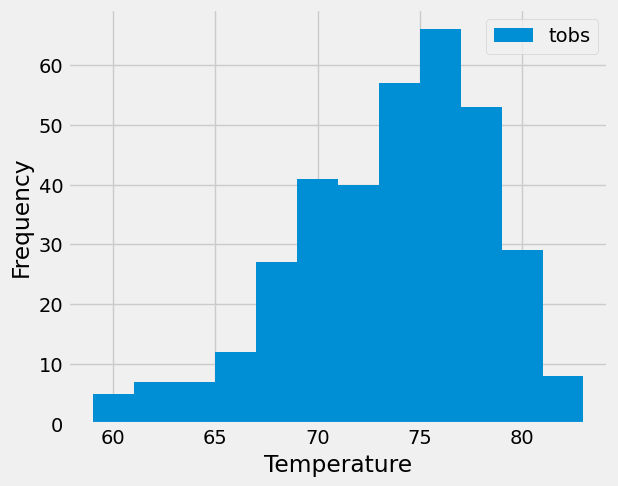

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# with bins = 12


# Close Session

In [16]:
# Close Session
session.close()